In [1]:
# Import necessary libraries and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fastbook import *
from fastai.tabular.all import *
from dtreeviz.trees import *
from sklearn.tree import DecisionTreeClassifier

# Import custom classes
from functions.value_encoding import DataEncoder

# Load the dataset and select relevant columns
data = pd.read_csv("processed_data.csv", low_memory=False)
data.drop(columns="description", inplace=True)


/Users/workaccount/Documents/coding/accounting_project/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
data

,account,amount,direction,label,day_of_week,bank
0,a 1,7.398144,credit,a,Tuesday,a
1,a 1,2.667228,debit,b,Tuesday,a
2,a 1,2.667228,debit,b,Tuesday,a
3,a 1,5.403015,debit,b,Tuesday,a
4,a 1,1.463255,debit,b,Tuesday,a
...,...,...,...,...,...,...
1702,a 3,7.324457,debit,b,Wednesday,a
1703,a 3,6.753814,debit,c,Wednesday,a
1704,a 3,5.732370,debit,c,Wednesday,a
1705,a 3,8.827604,credit,d,Wednesday,a


In [3]:
data.describe()

,amount
count,1707.000000
mean,6.727022
std,2.155905
min,-0.616186
25%,5.403663
50%,7.170469
75%,8.051443
max,15.319588


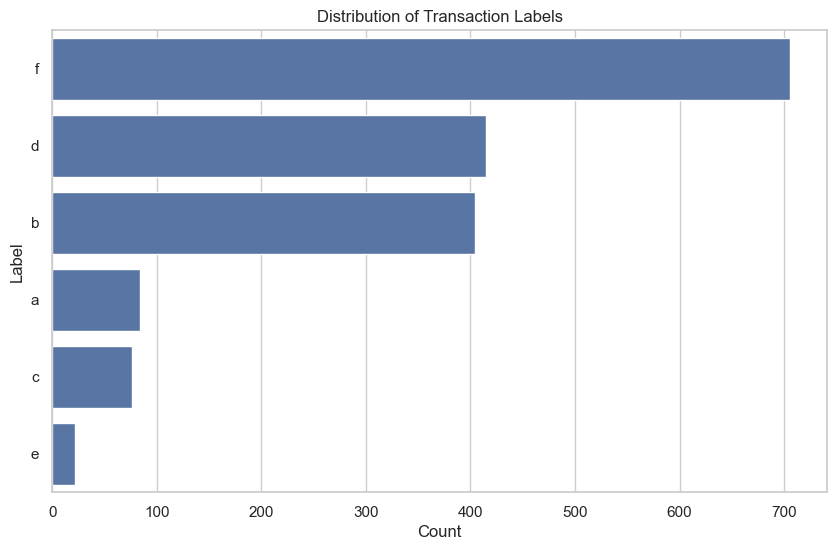

In [4]:
sns.set(style="whitegrid")

# Distribution of the target variable 'label'
plt.figure(figsize=(10, 6))
sns.countplot(y="label", data=data, order=data["label"].value_counts().index)
plt.title("Distribution of Transaction Labels")
plt.xlabel("Count")
plt.ylabel("Label")
plt.show()


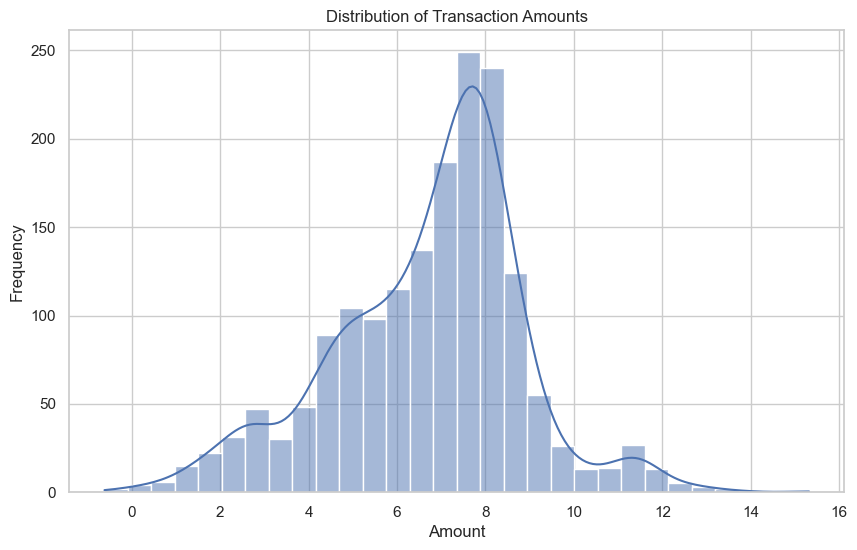

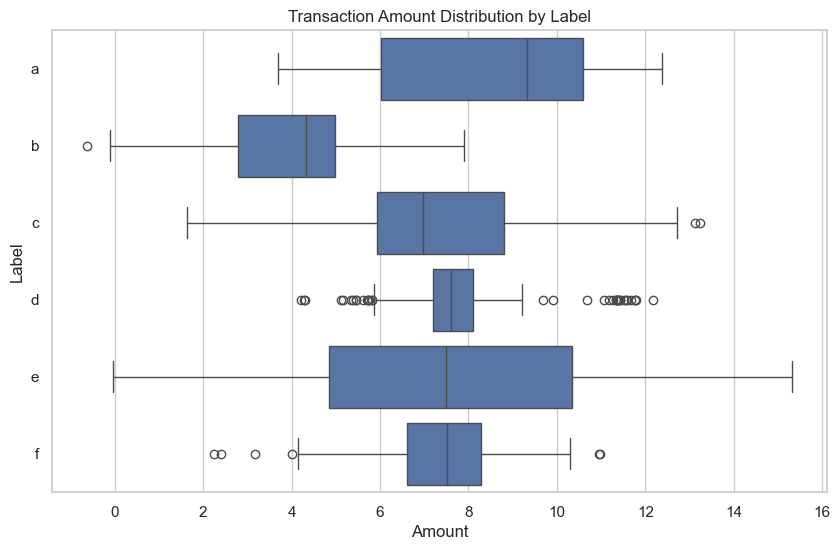

In [5]:
# Distribution of the 'amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(data["amount"], kde=True, bins=30)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Boxplot to see the distribution of 'amount' across different labels
plt.figure(figsize=(10, 6))
sns.boxplot(y="label", x="amount", data=data)
plt.title("Transaction Amount Distribution by Label")
plt.xlabel("Amount")
plt.ylabel("Label")
plt.show()


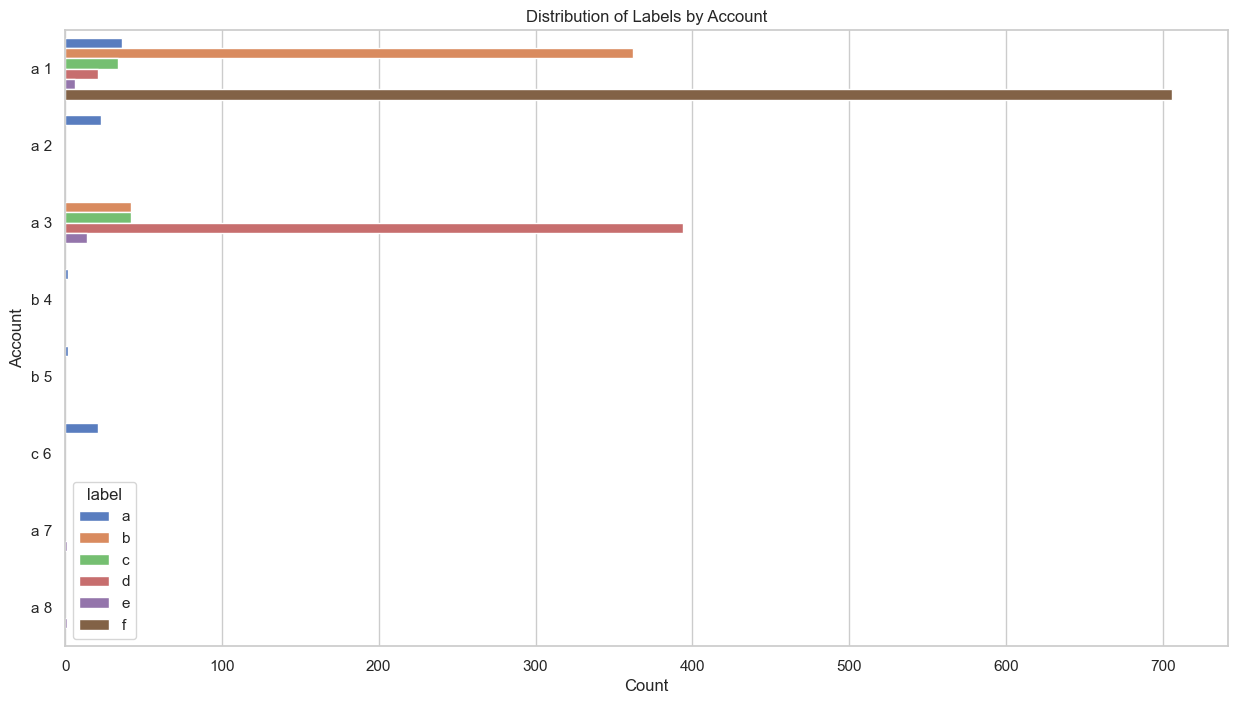

In [6]:
# Count plot for 'account' feature against the labels
plt.figure(figsize=(15, 8))
sns.countplot(y="account", hue="label", data=data, palette="muted")
plt.title("Distribution of Labels by Account")
plt.xlabel("Count")
plt.ylabel("Account")
plt.show()


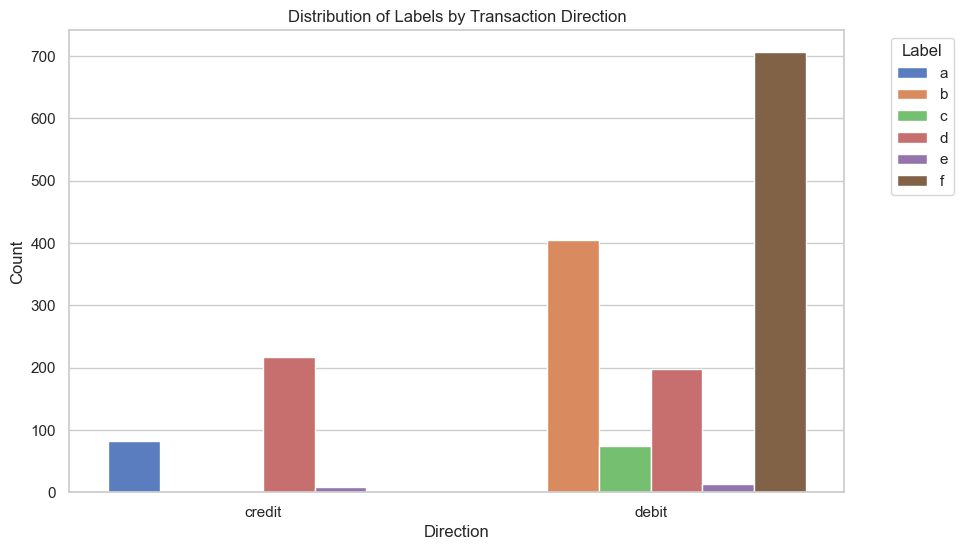

In [7]:
# Count plot for 'direction' feature against the labels
plt.figure(figsize=(10, 6))
sns.countplot(x='direction', hue='label', data=data, palette="muted")
plt.title('Distribution of Labels by Transaction Direction')
plt.xlabel('Direction')
plt.ylabel('Count')
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


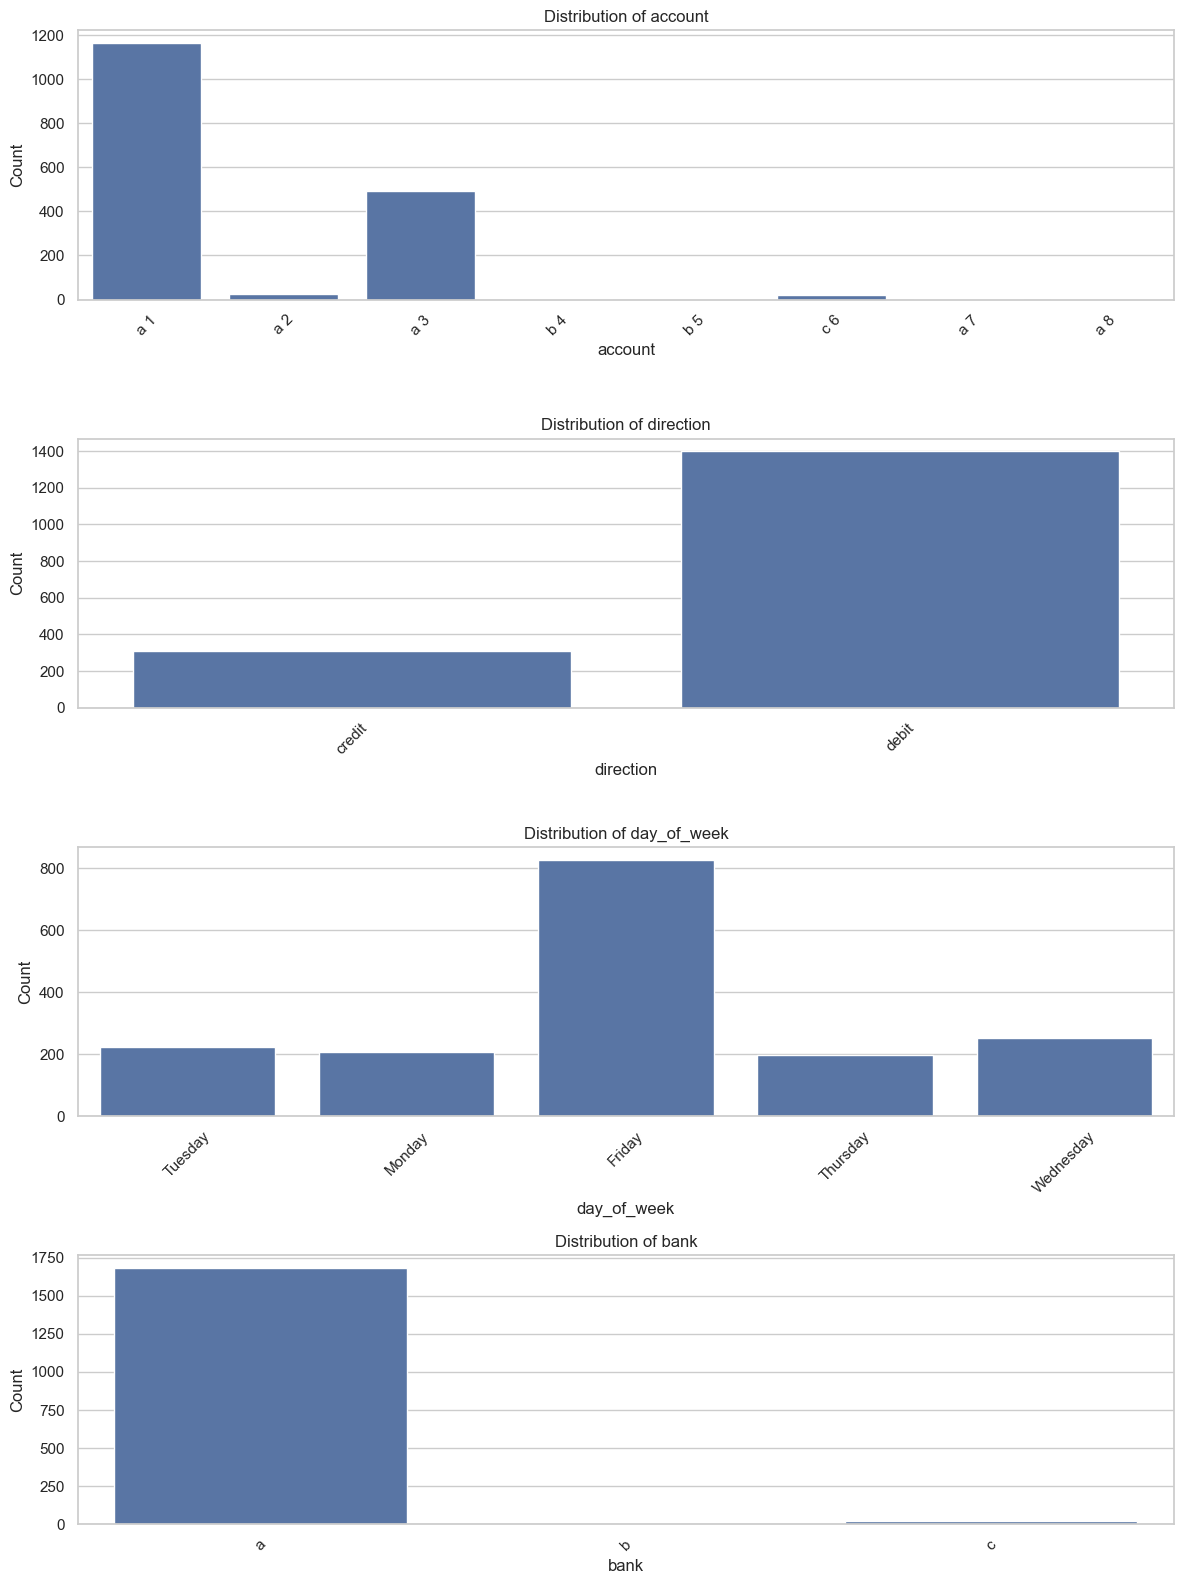

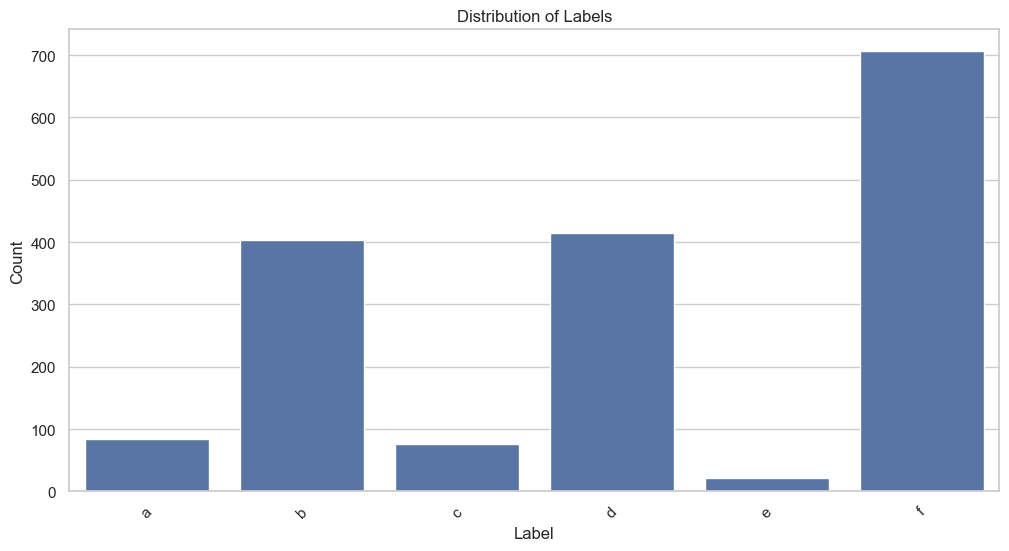

In [8]:
# Analyzing the distribution of categorical features
categorical_features = ["account", "direction", "day_of_week", "bank"]

fig, axes = plt.subplots(
    len(categorical_features), 1, figsize=(12, len(categorical_features) * 4)
)

for i, cat_feature in enumerate(categorical_features):
    sns.countplot(data=data, x=cat_feature, ax=axes[i])
    axes[i].set_title(f"Distribution of {cat_feature}")
    axes[i].set_xlabel(cat_feature)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

# Analyzing the balance of the 'label' column
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="label")
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


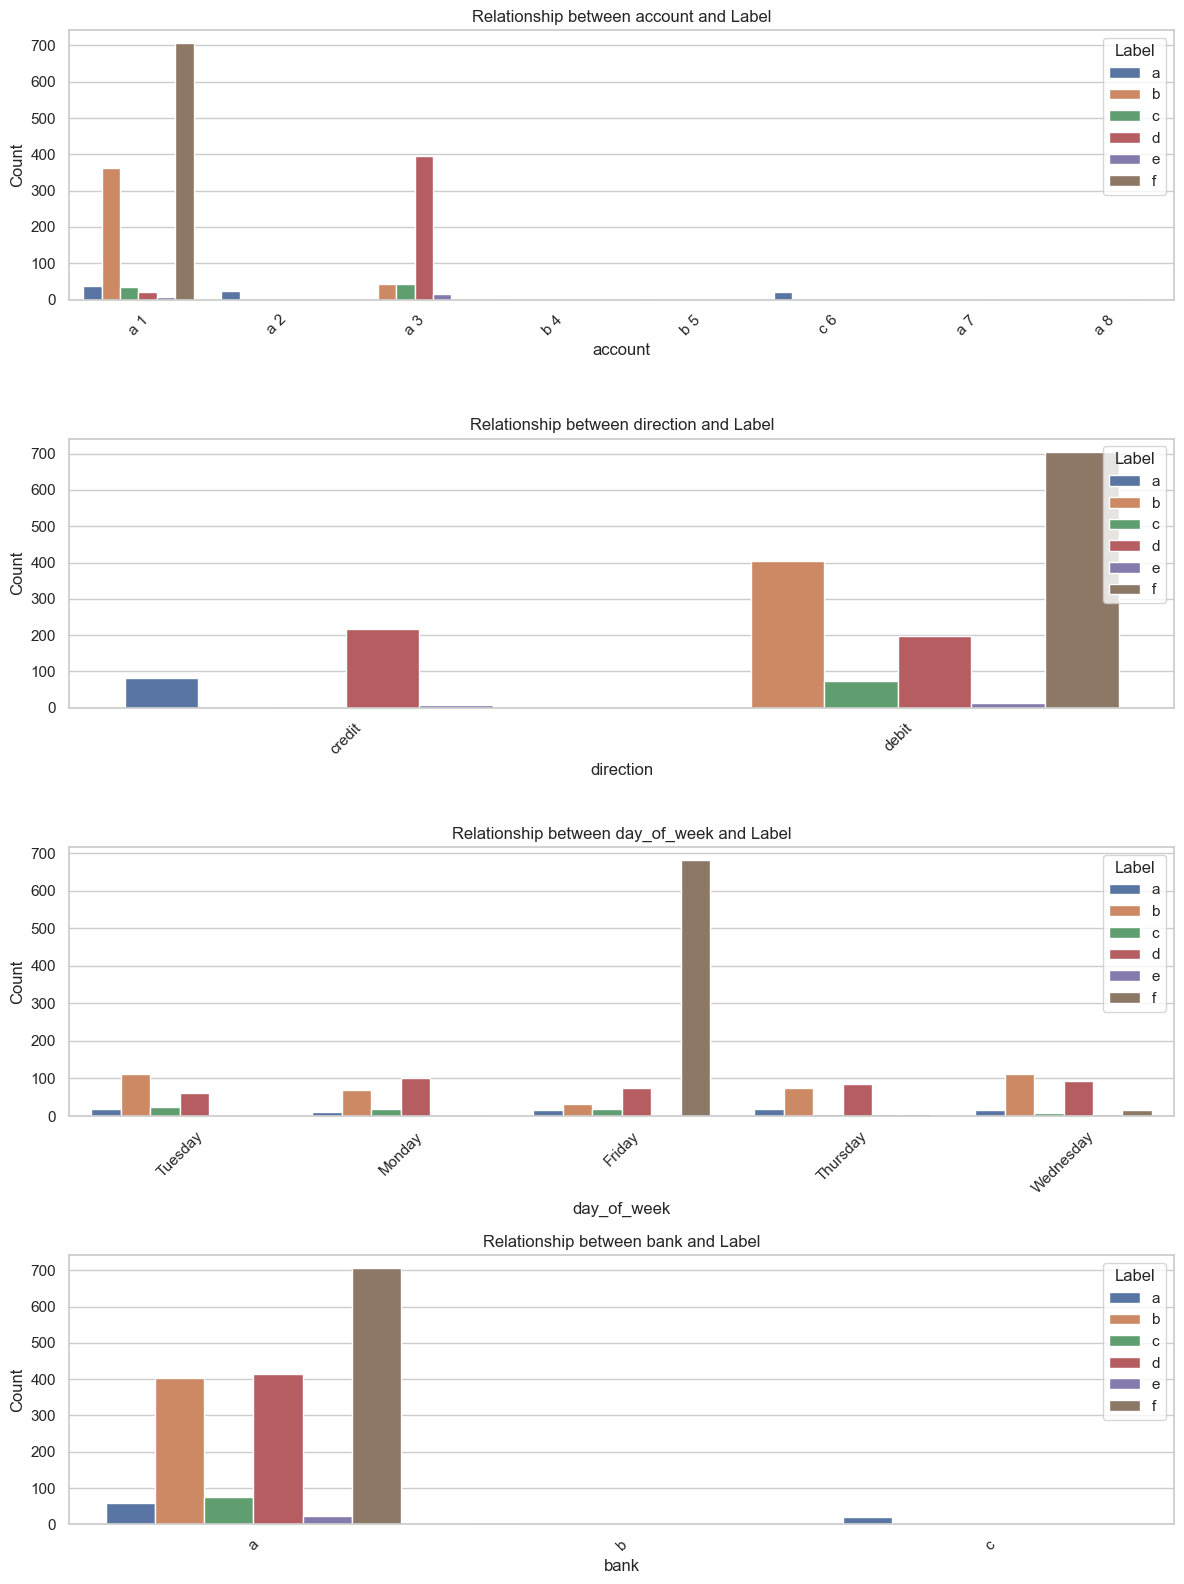

In [9]:
# Analysing the relationships between features and the 'label' column
# Creating plots for each categorical feature against the 'label' column
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(12, len(categorical_features) * 4))

for i, cat_feature in enumerate(categorical_features):
    sns.countplot(data=data, x=cat_feature, hue='label', ax=axes[i])
    axes[i].set_title(f'Relationship between {cat_feature} and Label')
    axes[i].set_xlabel(cat_feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Label', loc='upper right')

plt.tight_layout()
plt.show()



In [10]:
encoder = DataEncoder(data)
encoded_data = encoder.transform(data)

X_train, X_test, y_train, y_test = encoder.split_data(encoded_data, 0.2)


decision tree prediction 0.8830409356725146


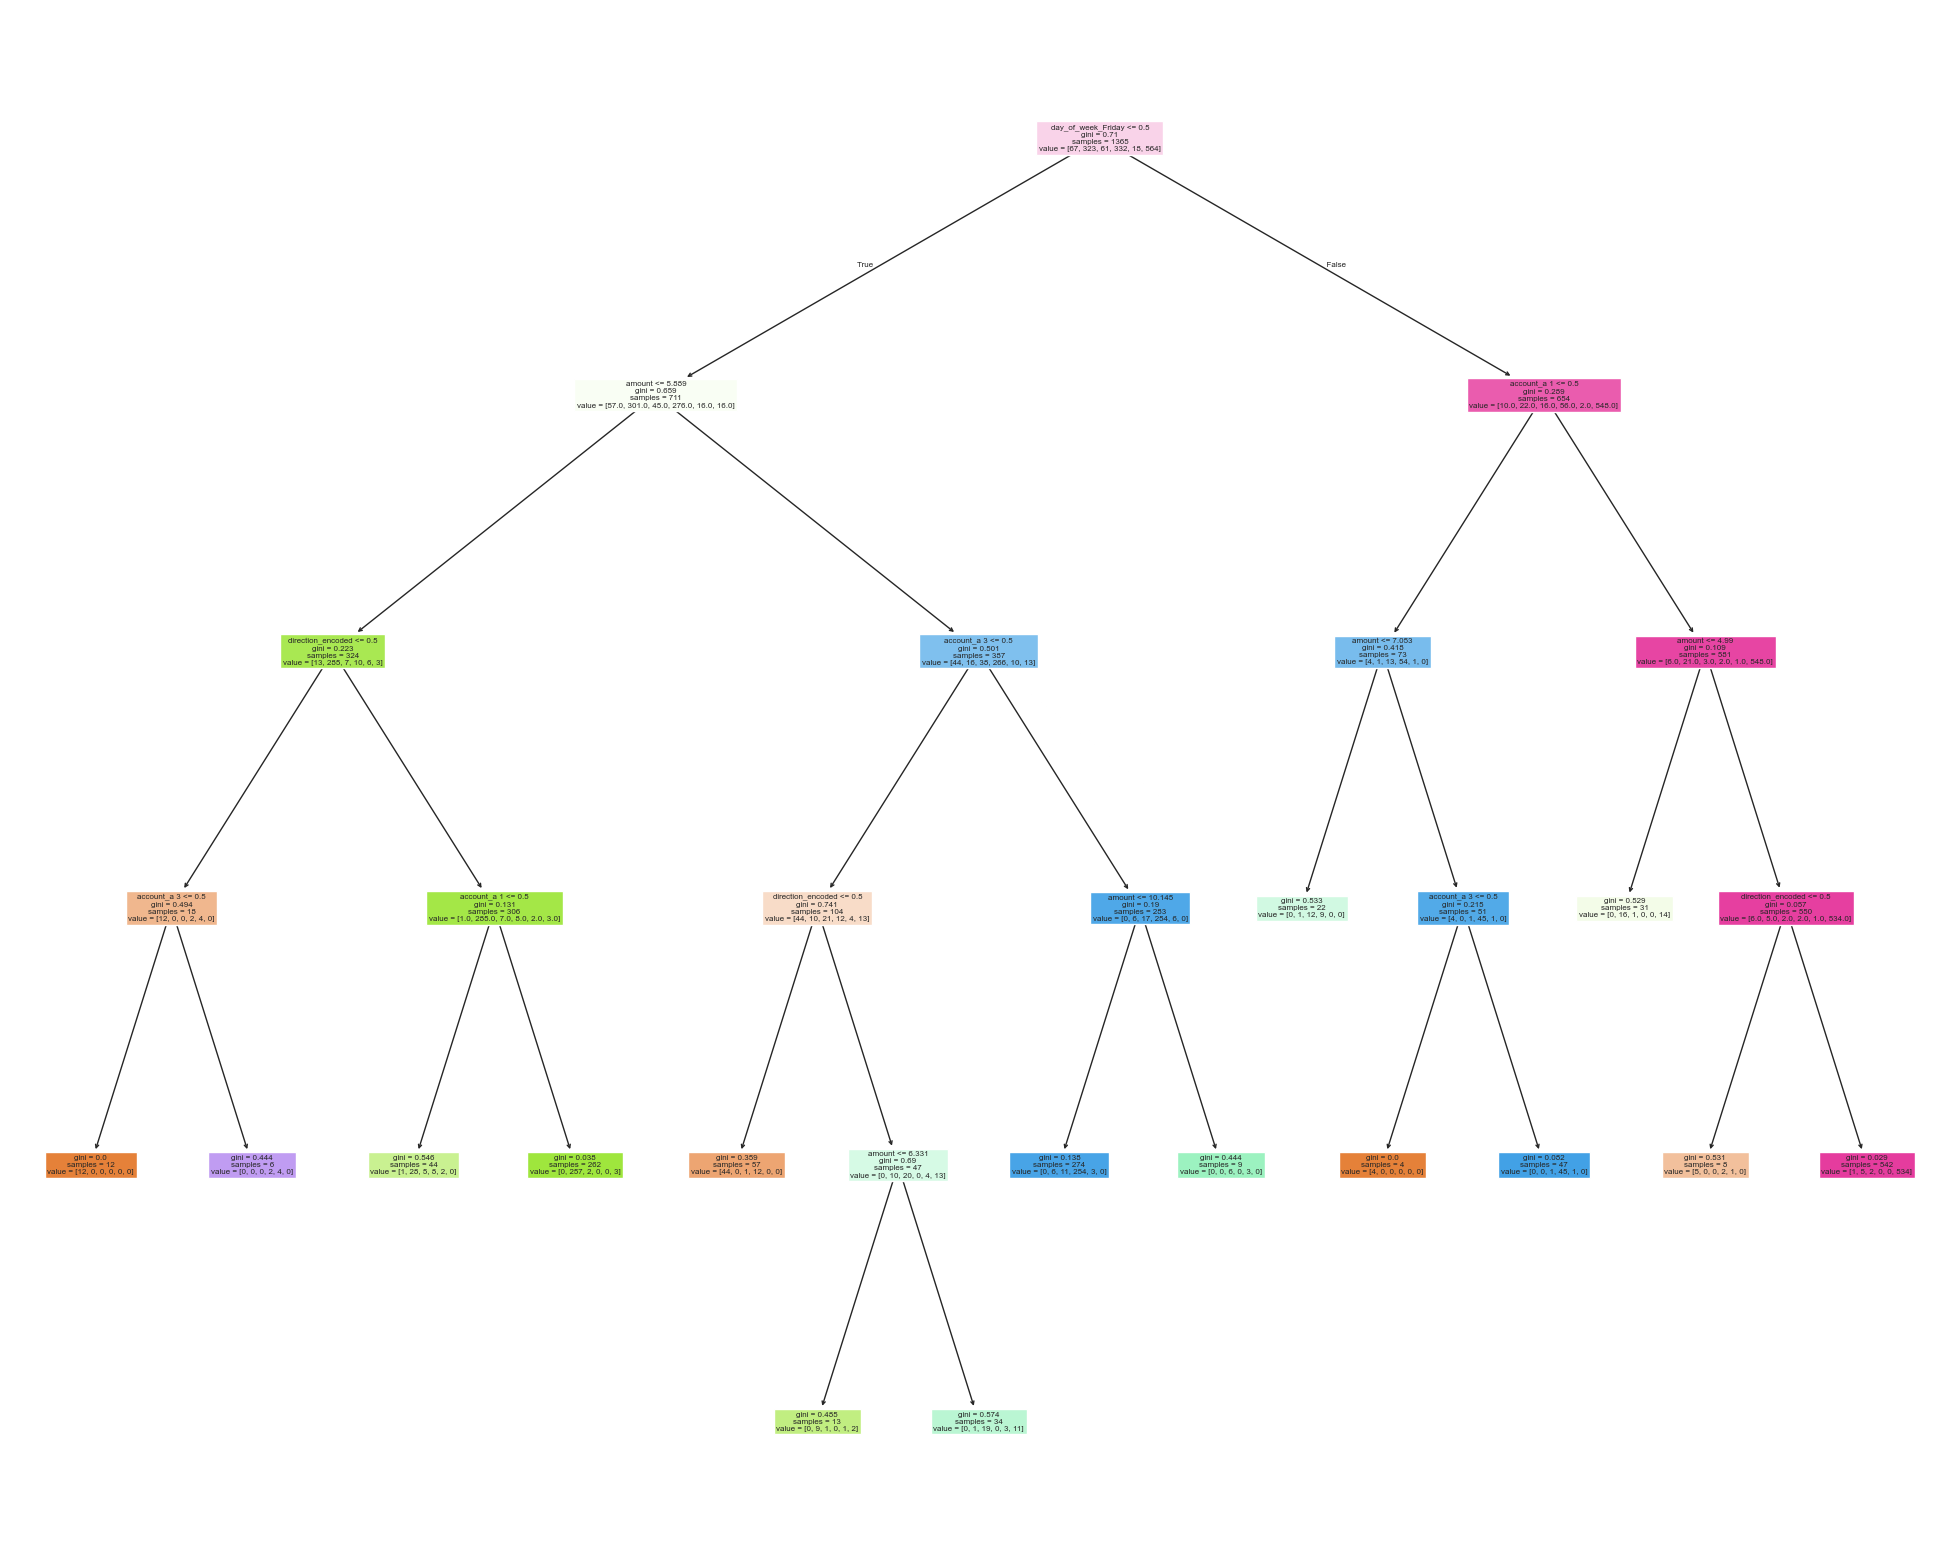

In [11]:
m = DecisionTreeClassifier(max_leaf_nodes=15)
m.fit(X_train, y_train)

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(m, feature_names=X_train.columns, filled=True)

print("decision tree prediction", (m.predict(X_test) == y_test).sum() / len(y_test))


In [12]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(m, X_train)
fi[:10]

,cols,imp
8,day_of_week_Friday,0.393488
16,amount,0.307907
0,account_a 1,0.127841
2,account_a 3,0.096757
17,direction_encoded,0.074006
5,account_b 4,0.000000
6,account_b 5,0.000000
7,account_c 6,0.000000
4,account_a 8,0.000000
1,account_a 2,0.000000


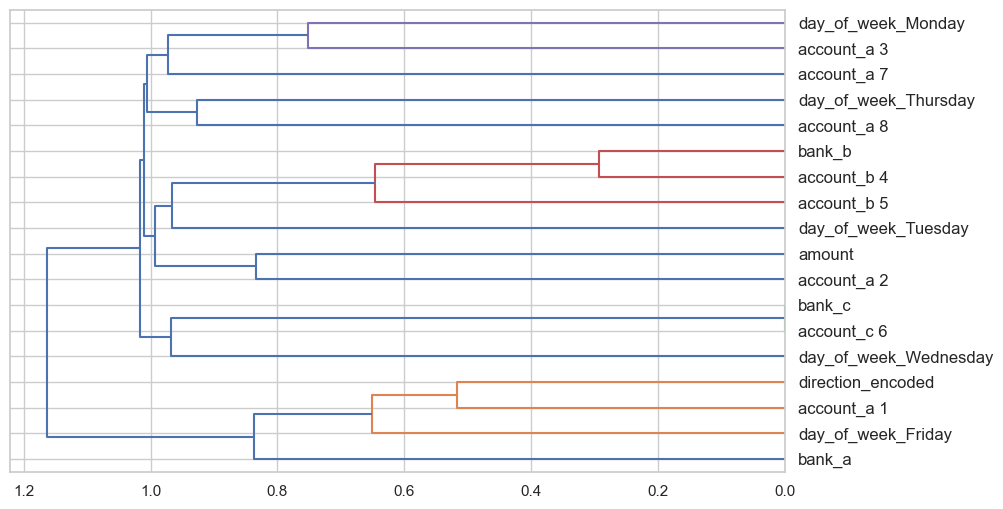

In [13]:
cluster_columns(X_train)
